# Exploratory feature engineering

In [5]:
import pandas as pd
import numpy as np
from src.data.data_fetcher import get_raw_data
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

from src.visualization.plotting import plot_correlation_matrix


In [6]:

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()



x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
x_whole.reset_index(drop=True, inplace=True)
y_whole.reset_index(drop=True, inplace=True)

x_whole.head()

c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:319: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:319: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimated_resampled = estimated.resample("1H").mean()
c:\Users\Bruker\OneDrive\NTNU semester 05\TDT4173 Maskinlæring\ml_power_predictor\src\features\feature_engineering.py:319: FutureWarning: The default value of numeric_o

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour
0,8.950,1.24900,0.00000,0.000000,523.099976,1.0,282.424988,0.000000,0.000000,0.000000,...,1.350,0.475,0.0,1,0,0,-0.126528,-0.991963,0.000000,1.000000
1,4.200,1.25200,0.00000,0.000000,725.250000,0.0,271.299988,0.000000,0.000000,0.000000,...,5.825,2.650,0.0,0,1,0,0.635068,0.772456,0.707107,0.707107
2,7.575,1.23975,0.00000,0.000000,1040.349976,1.0,279.774994,0.000000,0.000000,0.000000,...,-1.075,0.500,0.0,1,0,0,-0.928839,0.370483,0.707107,0.707107
3,8.525,1.23250,406653.21875,66.824997,2028.300049,0.0,281.750000,17.174999,85737.351562,0.000000,...,-2.150,-0.425,0.0,0,1,0,-0.997559,0.069828,-0.707107,-0.707107
4,3.900,1.26975,228987.65625,97.699997,3737.000000,0.0,270.299988,58.224998,145324.328125,16.700001,...,-1.725,0.175,0.0,0,1,0,-0.922329,0.386405,0.866025,-0.500000


## Removing of features with low variance

In [16]:
# Find name of all the columns that have a correlation of 0.9 or higher with pv_measurement
data_with_target = pd.concat([x_whole, y_whole], axis=1)
corr_matrix = data_with_target.corr()
corr_matrix["pv_measurement"].sort_values(ascending=False)


pv_measurement                    1.000000
direct_rad:W                      0.622384
direct_rad_1h:J                   0.613314
clear_sky_rad:W                   0.603887
clear_sky_energy_1h:J             0.595419
diffuse_rad:W                     0.529251
diffuse_rad_1h:J                  0.524499
sun_elevation:d                   0.504071
is_day:idx                        0.394098
location_a                        0.355057
t_1000hPa:K                       0.290041
dew_point_2m:K                    0.222257
absolute_humidity_2m:gm3          0.216766
visibility:m                      0.159721
pressure_100m:hPa                 0.149798
pressure_50m:hPa                  0.145867
sfc_pressure:hPa                  0.141928
msl_pressure:hPa                  0.131863
sin_hour                          0.125223
cloud_base_agl:m                  0.103004
sin_day_of_year                   0.024699
wind_speed_w_1000hPa:ms           0.001720
snow_drift:idx                   -0.002117
sun_azimuth

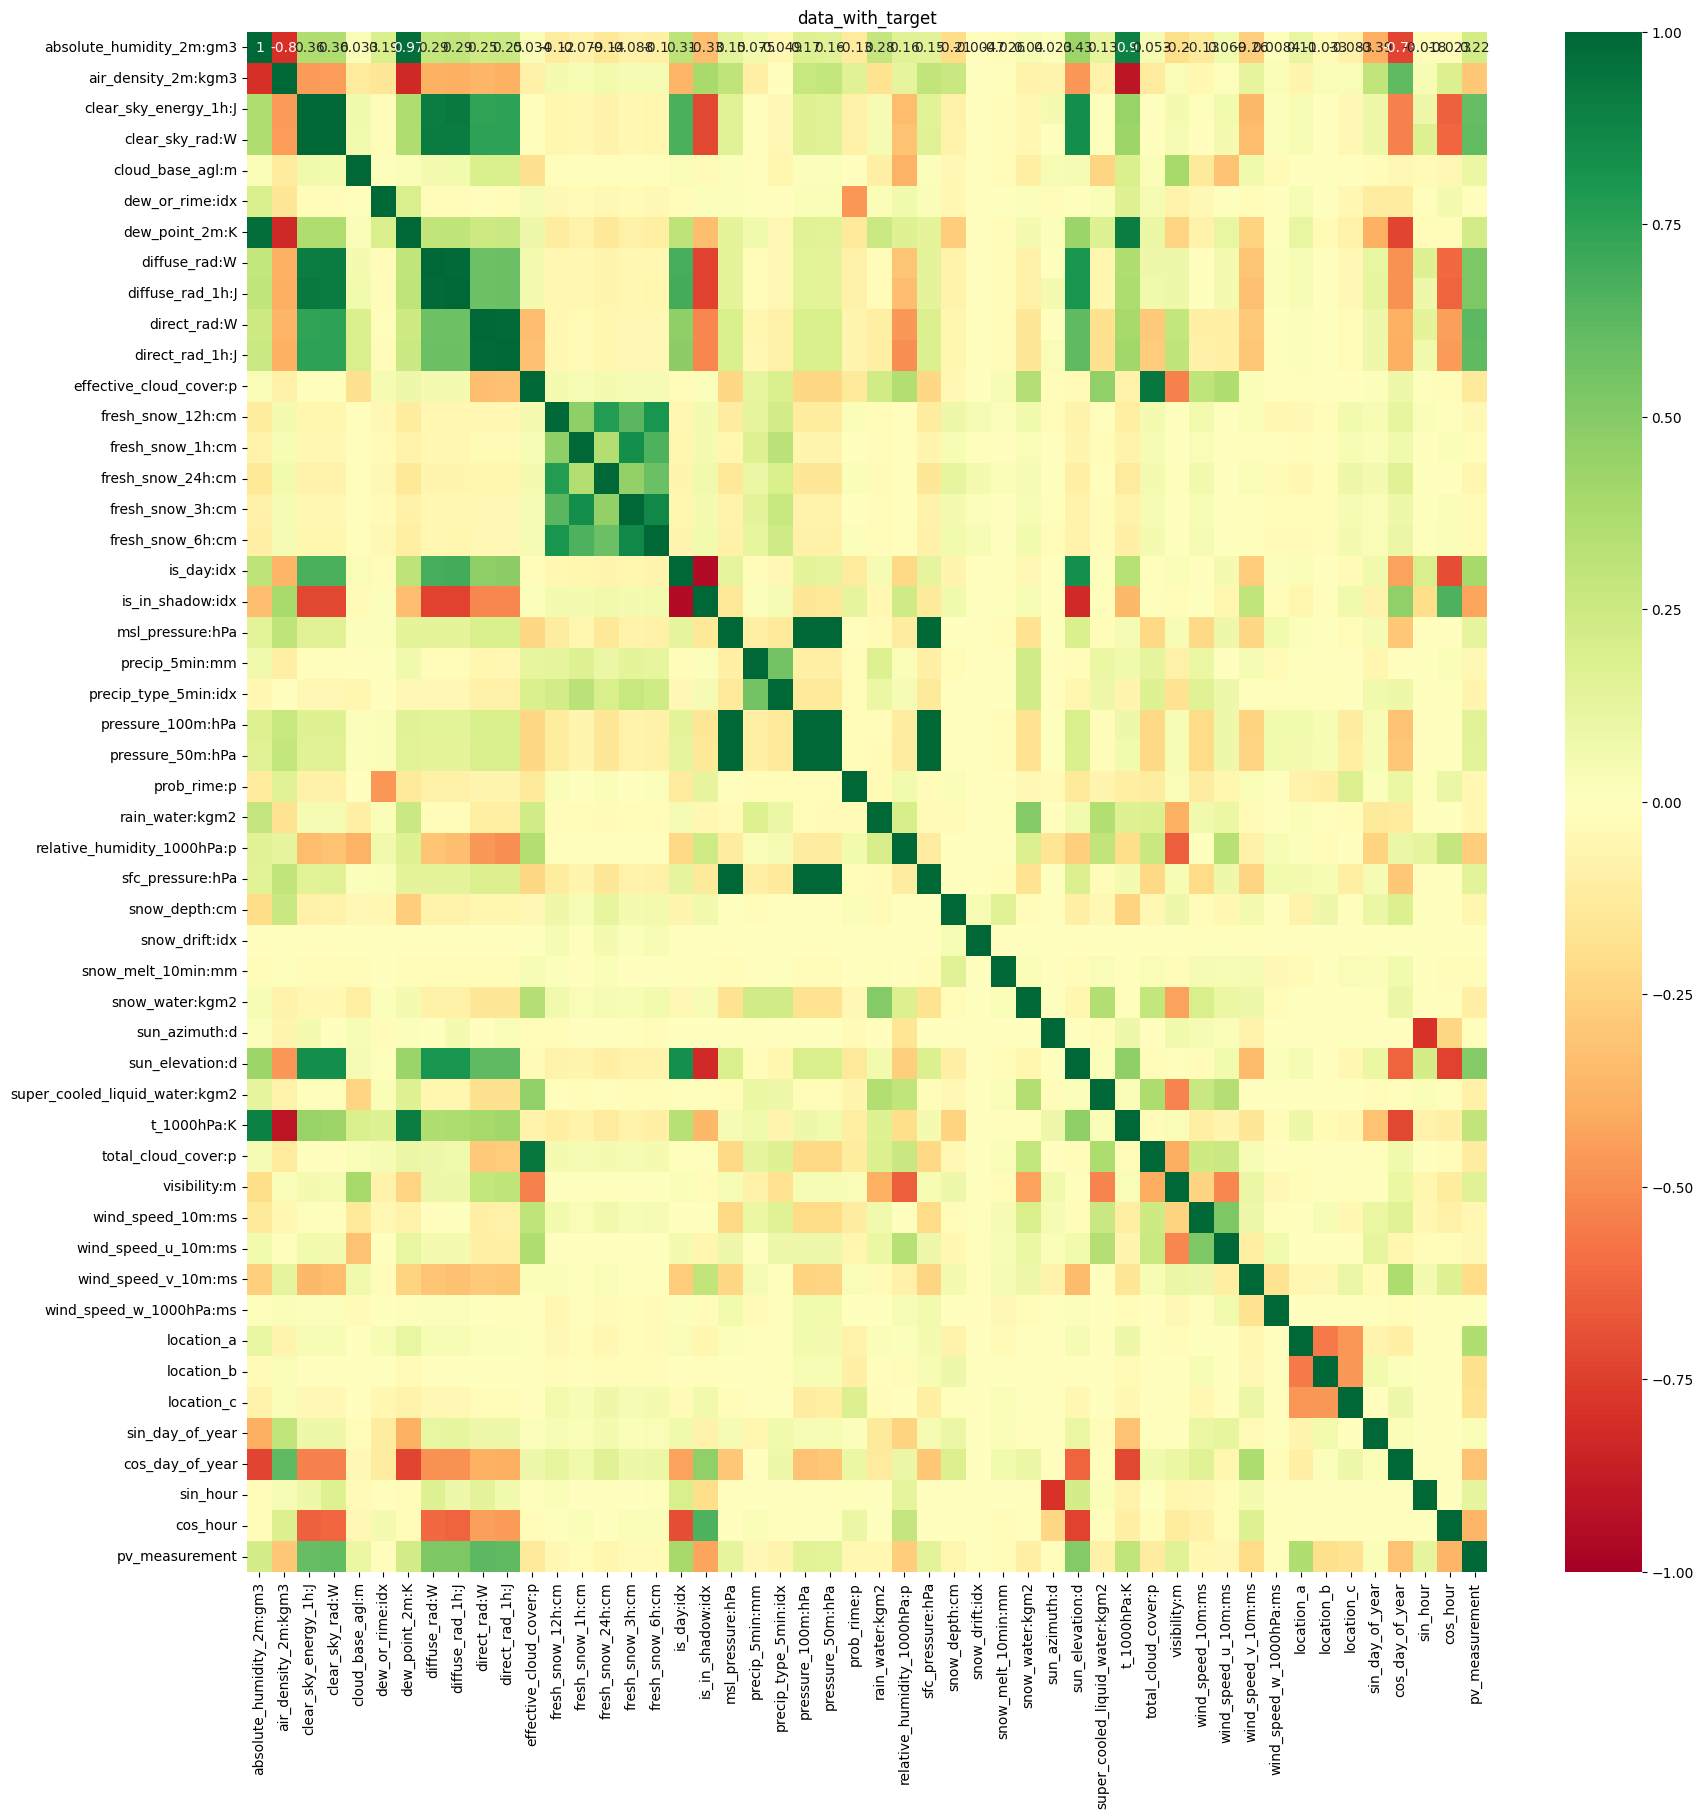

In [8]:

data_with_target = pd.concat([x_whole, y_whole], axis=1)
plot_correlation_matrix(data_with_target, "data_with_target", show=True)